In [1]:
import pandas as pd
import numpy as np
import glob
myPath="Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/*csv"
files=glob.glob(myPath)
li=[]
for file in files:
    li.append(pd.read_csv(file))
    print(file)
combined=pd.concat(li,ignore_index=True)
combined.to_csv("combined.csv")

Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data\Sales_April_2019.csv
Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data\Sales_August_2019.csv
Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data\Sales_December_2019.csv
Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data\Sales_February_2019.csv
Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data\Sales_January_2019.csv
Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data\Sales_July_2019.csv
Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data\Sales_June_2019.csv
Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data\Sales_March_2019.csv
Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data\Sales_May_2019.csv
Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data\Sales_November_2019.csv
Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data\Sales_October_2019.csv
Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data\Sales_September_2019.csv


In [2]:
combined.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [3]:
combined.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
combined.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
copied=combined

In [6]:
copied[["Order ID","Quantity Ordered","Price Each"]]=copied[["Order ID","Quantity Ordered","Price Each"]].apply(pd.to_numeric,errors="coerce")

In [7]:
copied.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558.0,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559.0,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560.0,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560.0,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [8]:
nan_cols=copied[copied.isna().any(axis=1)]

In [9]:
nan_cols = copied[copied.isna().any(axis=1)]

In [10]:
nan_cols

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
519,NaN,Product,NaN,NaN,Order Date,Purchase Address
735,NaN,NaN,NaN,NaN,NaN,NaN
1149,NaN,Product,NaN,NaN,Order Date,Purchase Address
...,...,...,...,...,...,...
186548,NaN,NaN,NaN,NaN,NaN,NaN
186563,NaN,Product,NaN,NaN,Order Date,Purchase Address
186632,NaN,Product,NaN,NaN,Order Date,Purchase Address
186738,NaN,Product,NaN,NaN,Order Date,Purchase Address


In [11]:
copied.dropna(how="all",axis=0,inplace=True)
copied.reset_index(drop=True,inplace=True)
copied.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558.0,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559.0,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560.0,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560.0,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561.0,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [12]:
copied.describe()

,Order ID,Quantity Ordered,Price Each
count,185950.000000,185950.000000,185950.000000
mean,230417.569379,1.124383,184.399735
std,51512.737110,0.442793,332.731330
min,141234.000000,1.000000,2.990000
25%,185831.250000,1.000000,11.950000
50%,230367.500000,1.000000,14.950000
75%,275035.750000,1.000000,150.000000
max,319670.000000,9.000000,1700.000000


In [13]:
copied["Amount Sold"]=copied["Quantity Ordered"]*combined["Price Each"]
copied.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Amount Sold
0,176558.0,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90
1,176559.0,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99
2,176560.0,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00
3,176560.0,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99
4,176561.0,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99


In [14]:
copied["Month"]=copied["Order Date"].str[0:2]


In [15]:
uniqueValues=copied["Month"].unique()
print(uniqueValues)

['04' '05' 'Or' '08' '09' '12' '01' '02' '03' '07' '06' '11' '10']


In [16]:
copied=copied[copied.Month!="Or"]

In [17]:
uniqueValues=copied["Month"].unique()
print(uniqueValues)

['04' '05' '08' '09' '12' '01' '02' '03' '07' '06' '11' '10']


In [18]:
groupedData=copied.groupby("Month").sum()
groupedData.sort_values("Amount Sold",ascending=False)

,Order ID,Quantity Ordered,Price Each,Amount Sold
Month,,,,
12,7.685905e+09,28114.0,4.588415e+06,4.613443e+06
10,5.457110e+09,22703.0,3.715555e+06,3.736727e+06
04,3.387347e+09,20558.0,3.367671e+06,3.390670e+06
11,5.047203e+09,19798.0,3.180601e+06,3.199603e+06
05,3.345872e+09,18667.0,3.135125e+06,3.152607e+06
03,2.564811e+09,17005.0,2.791208e+06,2.807100e+06
07,3.284140e+09,16072.0,2.632540e+06,2.647776e+06
06,2.932976e+09,15253.0,2.562026e+06,2.577802e+06
08,2.899374e+09,13448.0,2.230345e+06,2.244468e+06


In [19]:
import matplotlib.pyplot as plt

plt.bar(groupedData.index,groupedData["Amount Sold"])
plt.xlabel("Months")
plt.xticks(groupedData.index,rotation="vertical")
plt.ylabel("Sales in USD($)")
plt.show()

<Figure size 640x480 with 1 Axes>

In [20]:
copied["city"]=copied["Purchase Address"].str.split(',').str[1]
copied
groupedByCity=copied.groupby("city").sum().sort_values("Amount Sold",ascending=False)
groupedByCity

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Order ID,Quantity Ordered,Price Each,Amount Sold
city,,,,
San Francisco,1.030444e+10,50239.0,8.211462e+06,8.262204e+06
Los Angeles,6.811085e+09,33289.0,5.421435e+06,5.452571e+06
New York City,5.736334e+09,27932.0,4.635371e+06,4.664317e+06
Boston,4.598265e+09,22528.0,3.637410e+06,3.661642e+06
Atlanta,3.423838e+09,16602.0,2.779908e+06,2.795499e+06
Dallas,3.415644e+09,16730.0,2.752628e+06,2.767975e+06
Seattle,3.406694e+09,16553.0,2.733296e+06,2.747755e+06
Portland,2.868861e+09,14053.0,2.307747e+06,2.320491e+06
Austin,2.280982e+09,11153.0,1.809874e+06,1.819582e+06


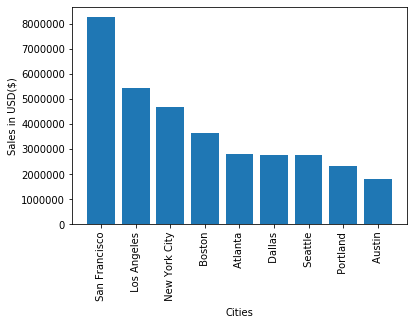

In [22]:
plt.bar(groupedByCity.index,groupedByCity["Amount Sold"])
plt.xlabel("Cities")
plt.xticks(groupedByCity.index,rotation="vertical")
plt.ylabel("Sales in USD($)")
plt.show()

In [23]:
recopied=copied
recopied['Order Date']=pd.to_datetime(copied['Order Date'])
recopied.head(5)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Amount Sold,Month,city
0,176558.0,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,04,Dallas
1,176559.0,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,04,Boston
2,176560.0,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,04,Los Angeles
3,176560.0,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,04,Los Angeles
4,176561.0,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,04,Los Angeles


In [24]:
recopied["Hour"]=recopied["Order Date"].dt.hour
groupedByHour=recopied.groupby("Hour").count()
groupedByHour

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Amount Sold,Month,city
Hour,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256


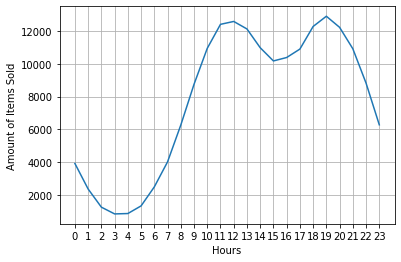

In [25]:
plt.plot(groupedByHour.index,groupedByHour["Amount Sold"])
plt.xlabel("Hours")
plt.xticks(groupedByHour.index)
plt.ylabel("Amount of Items Sold")
plt.grid()
plt.show()